# Import data

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('df_revised_advdlproject.csv')
df_train = pd.read_csv('train_revised_advdlproject.csv')
df_val = pd.read_csv('val_revised_advdlproject.csv')
df_test = pd.read_csv('test_revised_advdlproject.csv')

In [16]:
# convert into data
df_train_data = df.loc[df['imdb_id'].isin(df_train['imdb_id'])]
df_test_data = df.loc[df['imdb_id'].isin(df_test['imdb_id'])]
df_val_data = df.loc[df['imdb_id'].isin(df_val['imdb_id'])]

In [17]:
df_train_data = df_train_data.reset_index()
df_val_data = df_val_data.reset_index()
df_test_data = df_test_data.reset_index()

In [18]:
df.columns

Index(['imdb_id', 'runtimeMinutes', 'genres', 'cast', 'averageRating',
       'numVotes', 'title', 'original_title', 'overview', 'release_date',
       'revenue_worldwide_BOM', 'director', 'countries', 'country codes',
       'language codes', 'languages', 'Budget', 'cover url',
       'production companies'],
      dtype='object')

## Convert categorical data into label encoded multiple columns

#### Budget

In [27]:

# train , test, val

df_genres_train = df_train_data['genres'].str.split('|', expand=True)
df_genres_val = df_val_data['genres'].str.split('|', expand=True)
df_genres_test = df_test_data['genres'].str.split('|', expand=True)

# rename columns
df_genres_train = df_genres_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_val = df_genres_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_test = df_genres_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
genres_train = np.concatenate((np.concatenate((df_genres_train.g1.unique(), df_genres_train.g2.unique()),axis = 0)
                         , df_genres_train.g3.unique()),axis = 0)
genres_val = np.concatenate((np.concatenate((df_genres_val.g1.unique(), df_genres_val.g2.unique()),axis = 0)
                         , df_genres_val.g3.unique()),axis = 0)

set_genres_train = set(genres_train)
set_genres_val= set(genres_val)
set_genres_train_val = set_genres_train.union(set_genres_val)

list_genres = list(set_genres_train_val)

df_genres_modified_train = pd.DataFrame(np.zeros(shape=(len(df_genres_train),len(df_genres_train.columns))))
df_genres_modified_val = pd.DataFrame(np.zeros(shape=(len(df_genres_val),len(df_genres_val.columns))))
df_genres_modified_test = pd.DataFrame(np.zeros(shape=(len(df_genres_test),len(df_genres_test.columns))))

k = 0
for index, row in df_genres_train.iterrows():
    df_genres_modified_train.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_train.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_train.at[k,2] = list_genres.index(row['g3'])
    k = k+1

k = 0
for index,row in df_genres_val.iterrows():
    df_genres_modified_val.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_val.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_val.at[k,2] = list_genres.index(row['g3'])
    k = k+1
    
k = 0
for index,row in df_genres_test.iterrows():
    df_genres_modified_test.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_test.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_test.at[k,2] = list_genres.index(row['g3'])
    k = k+1

df_genres_modified_train = df_genres_modified_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_modified_val = df_genres_modified_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_modified_test = df_genres_modified_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

#### Director

In [28]:
# train , test, val

df_director_train = df_train_data['director'].str.split('|', expand=True)
df_director_val = df_val_data['director'].str.split('|', expand=True)
df_director_test = df_test_data['director'].str.split('|', expand=True)

# rename columns
df_director_train = df_director_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_director_val = df_director_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_director_test = df_director_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})

# conacatenate uniques from all columns because we want to count unique entries
director_train = np.concatenate((np.concatenate((np.concatenate((df_director_train.g1.unique(),
                                                 df_director_train.g2.unique()),axis = 0)
                         , df_director_train.g3.unique()),axis = 0), df_director_train.g4.unique()),axis = 0)
director_val = np.concatenate((np.concatenate((np.concatenate((df_director_val.g1.unique(),
                                                               df_director_val.g2.unique()),axis = 0)
                         , df_director_val.g3.unique()),axis = 0), df_director_val.g4.unique()),axis = 0)

set_director_train = set(director_train)
set_director_val= set(director_val)
set_director_train_val = set_director_train.union(set_director_val)

list_director = list(set_director_train_val)

df_director_modified_train = pd.DataFrame(np.zeros(shape=(len(df_director_train),len(df_director_train.columns))))
df_director_modified_val = pd.DataFrame(np.zeros(shape=(len(df_director_val),len(df_director_val.columns))))
df_director_modified_test = pd.DataFrame(np.zeros(shape=(len(df_director_test),len(df_director_test.columns))))


k = 0
for index, row in df_director_train.iterrows():
    cindex = 0
    for c in df_director_train.columns:
        df_director_modified_train.at[k,cindex] = list_director.index(row[c])
    k = k+1

k = 0
for index,row in df_director_val.iterrows():
    cindex = 0
    for c in df_director_val.columns:
        df_director_modified_val.at[k,cindex] = list_director.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_director)
for index,row in df_director_test.iterrows():
    cindex = 0
    for c in df_director_test.columns:
        df_director_modified_test.at[k,cindex] = list_director.index(row[c]) if row[c] in list_director else missing_index
    k = k+1


df_director_modified_train = df_director_modified_train.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})
df_director_modified_val = df_director_modified_val.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})
df_director_modified_test = df_director_modified_test.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})

#### Production Company

In [29]:
# train , test, val

df_pc_train = df_train_data['production companies'].str.split('|', expand=True)
df_pc_val = df_val_data['production companies'].str.split('|', expand=True)
df_pc_test = df_test_data['production companies'].str.split('|', expand=True)

# reanem columns
df_pc_train = df_pc_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_pc_val = df_pc_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_pc_test = df_pc_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})

# conacatenate uniques from all columns because we want to count unique entries
pc_train = np.concatenate((np.concatenate((np.concatenate((df_pc_train.g1.unique(),
                                                 df_pc_train.g2.unique()),axis = 0)
                         , df_pc_train.g3.unique()),axis = 0), df_pc_train.g4.unique()),axis = 0)
pc_val = np.concatenate((np.concatenate((np.concatenate((df_pc_val.g1.unique(),
                                                               df_pc_val.g2.unique()),axis = 0)
                         , df_pc_val.g3.unique()),axis = 0), df_pc_val.g4.unique()),axis = 0)

set_pc_train = set(pc_train)
set_pc_val= set(pc_val)
set_pc_train_val = set_pc_train.union(set_pc_val)

list_pc = list(set_pc_train_val)

df_pc_modified_train = pd.DataFrame(np.zeros(shape=(len(df_pc_train),len(df_pc_train.columns))))
df_pc_modified_val = pd.DataFrame(np.zeros(shape=(len(df_pc_val),len(df_pc_val.columns))))
df_pc_modified_test = pd.DataFrame(np.zeros(shape=(len(df_pc_test),len(df_pc_test.columns))))


k = 0
for index, row in df_pc_train.iterrows():
    cindex = 0
    for c in df_pc_train.columns:
        df_pc_modified_train.at[k,cindex] = list_pc.index(row[c])
    k = k+1

k = 0
for index,row in df_pc_val.iterrows():
    cindex = 0
    for c in df_pc_val.columns:
        df_pc_modified_val.at[k,cindex] = list_pc.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_pc)
for index,row in df_pc_test.iterrows():
    cindex = 0
    for c in df_pc_test.columns:
        df_pc_modified_test.at[k,cindex] = list_pc.index(row[c]) if row[c] in list_pc else missing_index
    k = k+1

df_pc_modified_train = df_pc_modified_train.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})
df_pc_modified_val = df_pc_modified_val.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})
df_pc_modified_test = df_pc_modified_test.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})

#### Cast

In [30]:
# train , test, val

df_cast_train = df_train_data['cast'].str.split('|', expand=True)
df_cast_val = df_val_data['cast'].str.split('|', expand=True)
df_cast_test = df_test_data['cast'].str.split('|', expand=True)

# reanem columns
df_cast_train = df_cast_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_cast_val = df_cast_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_cast_test = df_cast_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
cast_train = np.concatenate((np.concatenate((df_cast_train.g1.unique(),
                                                 df_cast_train.g2.unique()),axis = 0)
                         , df_cast_train.g3.unique()),axis = 0)
cast_val = np.concatenate((np.concatenate((df_cast_val.g1.unique(),
                                                               df_cast_val.g2.unique()),axis = 0)
                         , df_cast_val.g3.unique()),axis = 0)

set_cast_train = set(cast_train)
set_cast_val= set(cast_val)
set_cast_train_val = set_cast_train.union(set_cast_val)

list_cast = list(set_cast_train_val)

df_cast_modified_train = pd.DataFrame(np.zeros(shape=(len(df_cast_train),len(df_cast_train.columns))))
df_cast_modified_val = pd.DataFrame(np.zeros(shape=(len(df_cast_val),len(df_cast_val.columns))))
df_cast_modified_test = pd.DataFrame(np.zeros(shape=(len(df_cast_test),len(df_cast_test.columns))))

k = 0
for index, row in df_cast_train.iterrows():
    cindex = 0
    for c in df_cast_train.columns:
        df_cast_modified_train.at[k,cindex] = list_cast.index(row[c])
    k = k+1

k = 0
for index,row in df_cast_val.iterrows():
    cindex = 0
    for c in df_cast_val.columns:
        df_cast_modified_val.at[k,cindex] = list_cast.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_cast)
for index,row in df_cast_test.iterrows():
    cindex = 0
    for c in df_cast_test.columns:
        df_cast_modified_test.at[k,cindex] = list_cast.index(row[c]) if row[c] in list_cast else missing_index
    k = k+1

df_cast_modified_train = df_cast_modified_train.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})
df_cast_modified_val = df_cast_modified_val.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})
df_cast_modified_test = df_cast_modified_test.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})

#### Lang

In [31]:
# train , test, val

df_lang_train = df_train_data['cast'].str.split('|', expand=True)
df_lang_val = df_val_data['cast'].str.split('|', expand=True)
df_lang_test = df_test_data['cast'].str.split('|', expand=True)

# reanem columns
df_lang_train = df_lang_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_lang_val = df_lang_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_lang_test = df_lang_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
lang_train = np.concatenate((np.concatenate((df_lang_train.g1.unique(),
                                                 df_lang_train.g2.unique()),axis = 0)
                         , df_lang_train.g3.unique()),axis = 0)
lang_val = np.concatenate((np.concatenate((df_lang_val.g1.unique(),
                                                               df_lang_val.g2.unique()),axis = 0)
                         , df_lang_val.g3.unique()),axis = 0)

set_lang_train = set(lang_train)
set_lang_val= set(lang_val)
set_lang_train_val = set_lang_train.union(set_lang_val)

list_lang = list(set_lang_train_val)

df_lang_modified_train = pd.DataFrame(np.zeros(shape=(len(df_lang_train),len(df_lang_train.columns))))
df_lang_modified_val = pd.DataFrame(np.zeros(shape=(len(df_lang_val),len(df_lang_val.columns))))
df_lang_modified_test = pd.DataFrame(np.zeros(shape=(len(df_lang_test),len(df_lang_test.columns))))

k = 0
for index, row in df_lang_train.iterrows():
    cindex = 0
    for c in df_lang_train.columns:
        df_lang_modified_train.at[k,cindex] = list_lang.index(row[c])
    k = k+1

k = 0
for index,row in df_lang_val.iterrows():
    cindex = 0
    for c in df_lang_val.columns:
        df_lang_modified_val.at[k,cindex] = list_lang.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_lang)
for index,row in df_lang_test.iterrows():
    cindex = 0
    for c in df_lang_test.columns:
        df_lang_modified_test.at[k,cindex] = list_lang.index(row[c]) if row[c] in list_lang else missing_index
    k = k+1

df_lang_modified_train = df_lang_modified_train.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})
df_lang_modified_val = df_lang_modified_val.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})
df_lang_modified_test = df_lang_modified_test.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})

## Random Forest

#### 
set parameters :  n_jobs = -1, criterion = squared_error <br/>
Hyperparameters to be tuned - <br/>
min_sample_leaf,max_features, n_estimators, max_depth <br/>

In [54]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=ec4629e2e7101aaa5c19fdb527db599b7c062d60d952fbcda2c4f6d6c70859bb
  Stored in directory: /Users/shikhaasrani/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [32]:
from sklearn.ensemble import RandomForestRegressor

## Getting data ready for training, validation and testing

In [33]:
df_train_runMin = df_train_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_train_budget = df_train_data['Budget'].replace(np.nan, 0)
df_val_runMin = df_val_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_val_budget = df_val_data['Budget'].replace(np.nan, 0)
df_test_runMin = df_test_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_test_budget = df_test_data['Budget'].replace(np.nan, 0)

In [34]:
### includes all columns preserve for copy paste
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)


all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [35]:
all_columns_train.shape

(8186, 19)

In [36]:
X_train = all_columns_train.to_numpy()
y_train = df_train_data['averageRating'].to_numpy()
X_val = all_columns_val.to_numpy()
y_val_df = df_val_data['averageRating']
X_test = all_columns_test.to_numpy()
y_test_df = df_test_data['averageRating']

## Hyperparameter tuning

In [67]:
n = len(all_columns_train.columns)
min_samples_leaf = 2**np.arange(3)
# max_features= np.unique(np.array([n,3*n/4,n/2,n/3,n/4,np.sqrt(n)]).round().astype(int))
max_features = ['auto', 'sqrt', 'log2']
n_estimators = [50,100,150,200,250,300]
max_depth = [10,12,14,16,18,20]

In [39]:
# max_depth=10, random_state=0, min_samples_leaf=1 , max_features = 'auto', n_estimators = 100

In [40]:
from itertools import product
combs = list(product(min_samples_leaf,max_features,n_estimators,max_depth))
combs_result = []
index_of_combs = 0
for hp1,hp2,hp3,hp4 in combs:
    regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                                 min_samples_leaf = hp1, max_features = hp2,
                                 max_depth = hp4, random_state=0)
    regr.fit(X_train, y_train)
    pred_y_val = regr.predict(X_val)
    pred_y_val_df = pd.DataFrame(pred_y_val)
    pred_y_val_df = pred_y_val_df.squeeze()
    sum_error = 0
    k = 0
    for i in range(len(y_val_df)):
        error = pow((y_val_df.at[i] - pred_y_val_df.at[i]),2)
        sum_error = sum_error + error
        k = k+1
    print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
    print(sum_error/k)
    combs_result.append([index_of_combs,(sum_error/k)])
    index_of_combs = index_of_combs + 1

min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 10
0.8454298000444078
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 12
0.8514069459443856
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 14
0.8581738241444374
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 16
0.8742391769805385
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 18
0.879195008186366
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 20
0.8777755138194888
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
0.8377698387242156
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 12
0.8445353771289309
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 14
0.8484166562114538
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 16
0.8589247885657505
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 18
0.8625885029453828
min_samples_leaf:

min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 14
0.8668756583799324
min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 16
0.8550939071927816
min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 18
0.854508276958535
min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 20
0.8505558024929596
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 10
0.9067814002031319
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 12
0.88232235374431
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 14
0.867159592486009
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 16
0.8542602391905486
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 18
0.8512723671945759
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 20
0.8474371418494646
min_samples_leaf: 1 max_features: log2 n_estimators: 300 max_depth: 10
0.9065174607566137
min_samples_le

min_samples_leaf: 2 max_features: log2 n_estimators: 50 max_depth: 18
0.8578586393649787
min_samples_leaf: 2 max_features: log2 n_estimators: 50 max_depth: 20
0.8594457098441751
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 10
0.90061761795806
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 12
0.8778366323681516
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 14
0.8712330107880635
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 16
0.8699271134784407
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 18
0.8570756306852173
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 20
0.8467161120456067
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 10
0.9032415877547149
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 12
0.8790732200852602
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 14
0.8673372493712408
min_samples_le

min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 10
0.9144835600348284
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 12
0.8904686697086553
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 14
0.8794736586601395
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 16
0.869661115980202
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 18
0.8711396220725426
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 20
0.869423560186386
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 10
0.9128228733841973
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 12
0.8894598061724236
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 14
0.8793456517240023
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 16
0.8700720949848221
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 18
0.869968408975376
min_samples_l

In [41]:
combs_result

[[0, 0.8454298000444078],
 [1, 0.8514069459443856],
 [2, 0.8581738241444374],
 [3, 0.8742391769805385],
 [4, 0.879195008186366],
 [5, 0.8777755138194888],
 [6, 0.8377698387242156],
 [7, 0.8445353771289309],
 [8, 0.8484166562114538],
 [9, 0.8589247885657505],
 [10, 0.8625885029453828],
 [11, 0.8624342553180071],
 [12, 0.8383667138522425],
 [13, 0.8434069662103916],
 [14, 0.848489187687882],
 [15, 0.8579216527316118],
 [16, 0.8604691700572603],
 [17, 0.8602540969251493],
 [18, 0.8380710617430659],
 [19, 0.8424922793614368],
 [20, 0.8478279541542652],
 [21, 0.8550161311105628],
 [22, 0.8579978238639973],
 [23, 0.857981618099786],
 [24, 0.8378251749574698],
 [25, 0.8420953654500726],
 [26, 0.8476118487463041],
 [27, 0.8539315589755404],
 [28, 0.857640950606355],
 [29, 0.8579278396630355],
 [30, 0.8368020692077963],
 [31, 0.8408918851752936],
 [32, 0.8461904990972786],
 [33, 0.8516386048791149],
 [34, 0.8557473600190887],
 [35, 0.8567070371235309],
 [36, 0.9176175038310134],
 [37, 0.8909871

In [42]:
sorted_combs_result = combs_result.sort(key = lambda i: float(i[1]))

In [43]:
combs_result

[[30, 0.8368020692077963],
 [138, 0.8369030461223896],
 [246, 0.8374644089503839],
 [114, 0.8374749234384824],
 [6, 0.8377698387242156],
 [24, 0.8378251749574698],
 [132, 0.8378291648267903],
 [228, 0.8379039560188248],
 [240, 0.8379699968429647],
 [120, 0.8380070021347005],
 [18, 0.8380710617430659],
 [12, 0.8383667138522425],
 [222, 0.8385282692203602],
 [126, 0.8386652396186118],
 [234, 0.8391775670391526],
 [247, 0.839308605153766],
 [216, 0.8400712472796259],
 [241, 0.8400764483315936],
 [229, 0.840459565091353],
 [31, 0.8408918851752936],
 [248, 0.8414927537111941],
 [139, 0.8416250442312536],
 [235, 0.8418130031188721],
 [25, 0.8420953654500726],
 [230, 0.8422150598704846],
 [223, 0.8422895928181973],
 [19, 0.8424922793614368],
 [242, 0.8425117909939879],
 [133, 0.8429368376630394],
 [249, 0.8432503499542584],
 [13, 0.8434069662103916],
 [236, 0.8435869376608991],
 [115, 0.8436520788019816],
 [127, 0.8440202517018178],
 [224, 0.8440283157027028],
 [121, 0.8441039717431308],
 [23

In [123]:
for i in range(10):
    (hp1,hp2,hp3,hp4) = combs[combs_result[i][0]]
    print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4, "combs", combs_result[i])

min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10 combs [30, 0.8368020692077963]
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10 combs [138, 0.8369030461223896]
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10 combs [246, 0.8374644089503839]
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10 combs [114, 0.8374749234384824]
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10 combs [6, 0.8377698387242156]
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10 combs [24, 0.8378251749574698]
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10 combs [132, 0.8378291648267903]
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10 combs [228, 0.8379039560188248]
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10 combs [240, 0.8379699968429647]
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10 combs 

In [80]:
combs_result[0][0]

64

In [110]:
list(all_columns_train.columns)

['Budget',
 'runtimeMinutes',
 'g1',
 'g2',
 'g3',
 'l1',
 'l2',
 'l3',
 'c1',
 'c2',
 'c3',
 'pc1',
 'pc2',
 'pc3',
 'pc4',
 'd1',
 'd2',
 'd3',
 'd4']

## Ablation study

In [45]:
# using the best 10 hyperparameters
# header = [combs_result[index_sorted_list[x]] for x in range(10)]
# header.insert(0,'ignored column')
# column_list = list(all_columns_train.columns)
# ablation_study = [header]
header = [combs_result[x][1] for x in range(10)]
header.insert(0,'ignored column')
column_list = list(all_columns_train.columns)
ablation_study = [header]

#ignoring each feature one by one
for ignore_index in range(n):
    combs_ablation_result = []
    combs_ablation_result.append(column_list[ignore_index])
    # using top 10 hyperparameters one by one
    for best_hyper_params in range(10):
        print(best_hyper_params)
        X_train = all_columns_train.loc[:,all_columns_train.columns[0:ignore_index].
                                        append(all_columns_train.columns[ignore_index+1:])].to_numpy()
        y_train = df_train_data['averageRating'].to_numpy()
        X_val = all_columns_val.loc[:,all_columns_val.columns[0:ignore_index].
                                    append(all_columns_val.columns[ignore_index+1:])].to_numpy()
        y_val_df = df_val_data['averageRating']
        X_test = all_columns_test.loc[:,all_columns_test.columns[0:ignore_index].
                             append(all_columns_test.columns[ignore_index+1:])].to_numpy()
        y_test_df = df_test_data['averageRating']
        
#         (hp1,hp2,hp3,hp4) = combs[index_sorted_list[best_hyper_params]]
        (hp1,hp2,hp3,hp4) = combs[combs_result[best_hyper_params][0]]
        regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                                 min_samples_leaf = hp1, max_features = hp2,
                                 max_depth = hp4,random_state=0)
        regr.fit(X_train, y_train)
        pred_y_val = regr.predict(X_val)
        pred_y_val_df = pd.DataFrame(pred_y_val)
        pred_y_val_df = pred_y_val_df.squeeze()
        sum_error = 0
        k = 0
        for i in range(len(y_val_df)):
            error = pow((y_val_df.at[i] - pred_y_val_df.at[i]),2)
            sum_error = sum_error + error
            k = k+1
        print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
        print(sum_error/k)
        combs_ablation_result.append(sum_error/k)
    ablation_study.append(combs_ablation_result)

0
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.8575042137243831
1
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
0.8572346820458546
2
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
0.8527767096627351
3
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
0.8579608702443946
4
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
0.8621645916369957
5
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
0.8587133854314744
6
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
0.8543357306440176
7
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
0.8482707999219055
8
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
0.8530811695553633
9
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
0.8528511542589783
0
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.91883

min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.8367298896574158
1
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
0.8386508031584168
2
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
0.8378474713526901
3
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
0.8437415070543699
4
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
0.8392559659277231
5
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
0.8340701069803443
6
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
0.8416292821655657
7
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
0.8372731473745133
8
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
0.8410856554055711
9
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
0.8372723486564909
0
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.8366687

min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.8372571369982952
1
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
0.8360511621465643
2
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
0.8383654601919511
3
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
0.8337062538581229
4
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
0.8424918854260954
5
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
0.8356255726719178
6
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
0.8385398434472198
7
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
0.8350439503554702
8
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
0.8409315103542329
9
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
0.8380710868911936


In [46]:
ablation_study_df = pd.DataFrame(ablation_study)

In [47]:
ablation_study_df

,0,1,2,3,4,5,6,7,8,9,10
0,ignored column,0.836802,0.836903,0.837464,0.837475,0.837770,0.837825,0.837829,0.837904,0.837970,0.838007
1,Budget,0.857504,0.857235,0.852777,0.857961,0.862165,0.858713,0.854336,0.848271,0.853081,0.852851
2,runtimeMinutes,0.918835,0.914899,0.912623,0.920112,0.919655,0.918843,0.916771,0.911909,0.911283,0.918734
3,g1,1.011445,1.008629,1.009727,1.005631,1.014011,1.011784,1.009408,1.012603,1.012465,1.008663
4,g2,0.872718,0.871663,0.874687,0.874722,0.873192,0.872786,0.871938,0.873233,0.872374,0.872500
5,g3,0.837536,0.839666,0.837274,0.837779,0.838689,0.837680,0.837659,0.840405,0.838257,0.840166
6,l1,0.834725,0.836614,0.839567,0.839582,0.838426,0.836780,0.839175,0.836928,0.837064,0.838057
7,l2,0.836705,0.842818,0.839147,0.842841,0.838326,0.839669,0.837525,0.839678,0.836573,0.837287
8,l3,0.834524,0.836395,0.837084,0.838100,0.835902,0.836709,0.837457,0.839363,0.837296,0.840564
9,c1,0.838377,0.838418,0.838462,0.837902,0.840965,0.838984,0.837133,0.833439,0.838658,0.838087


### use only best hyperparameter to plot the abaltion study

In [48]:
df_extract_best_reg = ablation_study_df.loc[:,:1]

In [49]:
df_extract_best_reg = df_extract_best_reg.sort_values(by=[1])

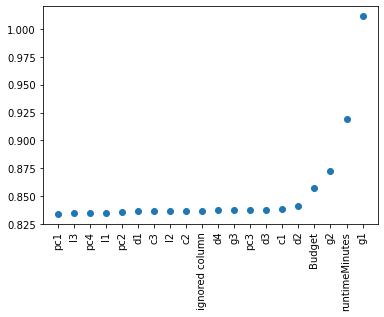

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_extract_best_reg.iloc[:,0])
y = np.array(df_extract_best_reg.iloc[:,1])

plt.scatter(x, y)
plt.xticks(rotation = 90)
plt.show()

In [68]:
column_list = list(all_columns_train.columns)

In [108]:
from itertools import combinations
ablations = combinations(column_list, 3) 

In [109]:
list(ablations)

[('Budget', 'runtimeMinutes', 'genre'),
 ('Budget', 'runtimeMinutes', 'languages'),
 ('Budget', 'runtimeMinutes', 'cast'),
 ('Budget', 'runtimeMinutes', 'production_company'),
 ('Budget', 'runtimeMinutes', 'director'),
 ('Budget', 'genre', 'languages'),
 ('Budget', 'genre', 'cast'),
 ('Budget', 'genre', 'production_company'),
 ('Budget', 'genre', 'director'),
 ('Budget', 'languages', 'cast'),
 ('Budget', 'languages', 'production_company'),
 ('Budget', 'languages', 'director'),
 ('Budget', 'cast', 'production_company'),
 ('Budget', 'cast', 'director'),
 ('Budget', 'production_company', 'director'),
 ('runtimeMinutes', 'genre', 'languages'),
 ('runtimeMinutes', 'genre', 'cast'),
 ('runtimeMinutes', 'genre', 'production_company'),
 ('runtimeMinutes', 'genre', 'director'),
 ('runtimeMinutes', 'languages', 'cast'),
 ('runtimeMinutes', 'languages', 'production_company'),
 ('runtimeMinutes', 'languages', 'director'),
 ('runtimeMinutes', 'cast', 'production_company'),
 ('runtimeMinutes', 'cast

In [105]:
for comb in ablations:
    print(comb)
    if 'genre'

('Budget', 'runtimeMinutes', 'genre')
('Budget', 'runtimeMinutes', 'languages')
('Budget', 'runtimeMinutes', 'cast')
('Budget', 'runtimeMinutes', 'production_company')
('Budget', 'runtimeMinutes', 'director')
('Budget', 'genre', 'languages')
('Budget', 'genre', 'cast')
('Budget', 'genre', 'production_company')
('Budget', 'genre', 'director')
('Budget', 'languages', 'cast')
('Budget', 'languages', 'production_company')
('Budget', 'languages', 'director')
('Budget', 'cast', 'production_company')
('Budget', 'cast', 'director')
('Budget', 'production_company', 'director')
('runtimeMinutes', 'genre', 'languages')
('runtimeMinutes', 'genre', 'cast')
('runtimeMinutes', 'genre', 'production_company')
('runtimeMinutes', 'genre', 'director')
('runtimeMinutes', 'languages', 'cast')
('runtimeMinutes', 'languages', 'production_company')
('runtimeMinutes', 'languages', 'director')
('runtimeMinutes', 'cast', 'production_company')
('runtimeMinutes', 'cast', 'director')
('runtimeMinutes', 'production_c

In [115]:
combs_ablation = [['Budget', 'runtimeMinutes', 'g1','g2','g3'],
['Budget', 'runtimeMinutes',  'l1','l2','l3'],
['Budget', 'runtimeMinutes',  'c1','c2','c3'],
['Budget', 'runtimeMinutes',  'pc1','pc2','pc3','pc4'],
['Budget', 'runtimeMinutes',  'd1','d2','d3','d4'],
['Budget', 'g1','g2','g3', 'l1','l2','l3'],
['Budget', 'g1','g2','g3', 'c1','c2','c3'],
['Budget', 'g1','g2','g3', 'pc1','pc2','pc3','pc4'],
['Budget', 'g1','g2','g3', 'd1','d2','d3','d4'],
['Budget', 'l1','l2','l3', 'c1','c2','c3'],
['Budget', 'l1','l2','l3', 'pc1','pc2','pc3','pc4'],
['Budget', 'l1','l2','l3', 'd1','d2','d3','d4'],
['Budget', 'c1','c2','c3', 'pc1','pc2','pc3','pc4'],
['Budget', 'c1','c2','c3', 'd1','d2','d3','d4'],
['Budget', 'pc1','pc2','pc3','pc4', 'd1','d2','d3','d4'],
['runtimeMinutes', 'g1','g2','g3', 'l1','l2','l3'],
['runtimeMinutes', 'g1','g2','g3', 'c1','c2','c3'],
['runtimeMinutes', 'g1','g2','g3', 'pc1','pc2','pc3','pc4'],
['runtimeMinutes', 'g1','g2','g3', 'd1','d2','d3','d4'],
['runtimeMinutes', 'l1','l2','l3', 'c1','c2','c3'],
['runtimeMinutes', 'l1','l2','l3', 'pc1','pc2','pc3','pc4'],
['runtimeMinutes', 'l1','l2','l3', 'd1','d2','d3','d4'],
['runtimeMinutes', 'c1','c2','c3', 'pc1','pc2','pc3','pc4'],
['runtimeMinutes', 'c1','c2','c3', 'd1','d2','d3','d4'],
['runtimeMinutes', 'pc1','pc2','pc3','pc4', 'd1','d2','d3','d4'],
['g1','g2','g3', 'l1','l2','l3', 'c1','c2','c3'],
['g1','g2','g3', 'l1','l2','l3', 'pc1','pc2','pc3','pc4'],
['g1','g2','g3', 'l1','l2','l3', 'd1','d2','d3','d4'],
['g1','g2','g3', 'c1','c2','c3', 'pc1','pc2','pc3','pc4'],
['g1','g2','g3', 'c1','c2','c3', 'd1','d2','d3','d4'],
['g1','g2','g3', 'pc1','pc2','pc3','pc4', 'd1','d2','d3','d4'],
['l1','l2','l3', 'c1','c2','c3', 'pc1','pc2','pc3','pc4'],
['l1','l2','l3', 'c1','c2','c3', 'd1','d2','d3','d4'],
['l1','l2','l3', 'pc1','pc2','pc3','pc4', 'd1','d2','d3','d4'],
['c1','c2','c3', 'pc1','pc2','pc3','pc4', 'd1','d2','d3','d4'],
                 ['Budget', 'g1','g2','g3']]

In [90]:
str(an[0])

"('Budget', 'runtimeMinutes', 'g1')"

In [103]:
column_list = ['Budget', 'runtimeMinutes', 'genre','languages','cast','production_company','director']

In [92]:
combs_result[0][0]

30

In [97]:
an[0]

('Budget', 'runtimeMinutes', 'g1')

In [113]:
all_columns_train.loc[:,combs_ablation[0]]

,Budget,runtimeMinutes,g1,g2,g3
0,48000000.0,118,21.0,8.0,11.0
1,10000000.0,88,18.0,3.0,20.0
2,400000.0,90,21.0,10.0,10.0
3,3500000.0,88,21.0,10.0,10.0
4,0.0,102,3.0,20.0,12.0
...,...,...,...,...,...
8181,0.0,115,21.0,9.0,10.0
8182,0.0,90,18.0,16.0,20.0
8183,0.0,120,5.0,10.0,10.0
8184,0.0,103,22.0,10.0,10.0


In [127]:
header = [combs_result[x][1] for x in range(10)]
header.insert(0,'chosen columns')

ablation_study = [header]

#ignoring each feature one by one
for use_index in range(len(combs_ablation)):
    for hyperparam_index in range(10):
        combs_ablation_result = []
        combs_ablation_result.append(str(combs_ablation[use_index]))
        # using top 10 hyperparameters one by one
        X_train = all_columns_train.loc[:,combs_ablation[use_index]].to_numpy()
        y_train = df_train_data['averageRating'].to_numpy()
        X_val = all_columns_val.loc[:,combs_ablation[use_index]].to_numpy()
        y_val_df = df_val_data['averageRating']

        (hp1,hp2,hp3,hp4) = combs[combs_result[hyperparam_index][0]]
        regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                                 min_samples_leaf = hp1, max_features = hp2,
                                 max_depth = hp4,random_state=0)
        regr.fit(X_train, y_train)
        pred_y_val = regr.predict(X_val)
        pred_y_val_df = pd.DataFrame(pred_y_val)
        pred_y_val_df = pred_y_val_df.squeeze()
        sum_error = 0
        k = 0
        for i in range(len(y_val_df)):
            error = pow((y_val_df.at[i] - pred_y_val_df.at[i]),2)
            sum_error = sum_error + error
            k = k+1
        print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
        print(sum_error/k)
        combs_ablation_result.append(sum_error/k)
    ablation_study.append(combs_ablation_result)

min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.8493800033499616
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
0.8512579587128353
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
0.8515970229735473
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
0.8515159111303614
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
0.8501317376789603
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
0.8495434558807844
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
0.8519168705273786
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
0.8504102332315969
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
0.8519309866469053
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
0.8510701707141495
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
1.1454248616767981
min_sample

min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
1.213766977004379
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
1.2166070065999157
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
1.2183447739137836
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
1.2194010549870682
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
1.2172779442993882
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
1.212557546568877
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
1.213617847182566
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
1.2169979210474562
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
1.216240840370016
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
1.2120845165171839
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
1.2101993098976802
min_samples_le

min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
0.8700862873823451
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
0.8708471130323581
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
0.8685569073057327
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
0.8672876370244568
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
0.869193665935874
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
0.8670443226520261
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
1.1418531654436366
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
1.1377066480727542
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
1.137332206849713
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
1.1400194105086447
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
1.1444425156734135
min_samples_

min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
0.9860071088165946
min_samples_leaf: 4 max_features: auto n_estimators: 150 max_depth: 10
0.9867857617242326
min_samples_leaf: 4 max_features: auto n_estimators: 250 max_depth: 10
0.9843682989512302
min_samples_leaf: 2 max_features: auto n_estimators: 150 max_depth: 10
0.987398427045679
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
1.0078289222116135
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
1.0010197027680419
min_samples_leaf: 4 max_features: auto n_estimators: 300 max_depth: 10
0.9949276615757994
min_samples_leaf: 2 max_features: auto n_estimators: 100 max_depth: 10
1.0000747435104336
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
1.009810226671185
min_samples_leaf: 1 max_features: auto n_estimators: 250 max_depth: 10
1.0088715960304278
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
1.0016045479374256
min_samples_

In [125]:
ablation_study_df = pd.DataFrame(ablation_study)

In [126]:
ablation_study_df

,0,1
0,chosen columns,"[0.8368020692077963, 0.8369030461223896, 0.837..."
1,"['Budget', 'runtimeMinutes', 'g1', 'g2', 'g3']",0.85107
2,"['Budget', 'runtimeMinutes', 'l1', 'l2', 'l3']",1.14216
3,"['Budget', 'runtimeMinutes', 'c1', 'c2', 'c3']",1.14216
4,"['Budget', 'runtimeMinutes', 'pc1', 'pc2', 'pc...",1.1824
5,"['Budget', 'runtimeMinutes', 'd1', 'd2', 'd3',...",1.20047
6,"['Budget', 'g1', 'g2', 'g3', 'l1', 'l2', 'l3']",0.90486
7,"['Budget', 'g1', 'g2', 'g3', 'c1', 'c2', 'c3']",0.90486
8,"['Budget', 'g1', 'g2', 'g3', 'pc1', 'pc2', 'pc...",0.908639
9,"['Budget', 'g1', 'g2', 'g3', 'd1', 'd2', 'd3',...",0.909106


## Testing 

using the best hyperparameters only <br/>
min_samples_leaf: 4 max_features: 6 n_estimators: 250 max_depth: 18

Selecting features according to ablation study - <br/>
Order 1 - g1, runTimeMinutes, g2, Budget, pc1, g3 <br/>
Order 2 - c2, pc3, d3, c3, l3, d1, c1, d2, d4 <br/>


Selecting features according to ablation study - <br/>
Order 1 - g1, runTimeMinutes, g2, Budget, g3, pc1 <br/>
Order 2 - l3, c1, d2, pc2, c3, d3, pc3, pc4, c2, l1, l2, d4 <br/>

In [64]:
X_train = all_columns_train[["g1", "g2", "Budget"]]
y_train = df_train_data['averageRating']
X_val = all_columns_val[["g1", "g2", "Budget"]]
y_val_df = df_val_data['averageRating']
X_test = all_columns_test[["g1", "g2", "Budget"]].to_numpy()
y_test_df = df_test_data['averageRating']

X_train_val = pd.concat([X_train, X_val]).to_numpy()
y_train_val = pd.concat([y_train, y_val_df]).to_numpy()

In [65]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4)
regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
0.7618023148240938


#### significant features only - Order 1

In [87]:
X_train = all_columns_train[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]].to_numpy()
y_train = df_train_data['averageRating'].to_numpy()
X_val = all_columns_val[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]].to_numpy()
y_val_df = df_val_data['averageRating']
X_test = all_columns_test[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]].to_numpy()
y_test_df = df_test_data['averageRating']

In [88]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4)
regr.fit(X_train, y_train)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 1 max_features: sqrt n_estimators: 250 max_depth: 18
0.9236156030698717


In [55]:
(hp1,hp2,hp3,hp4) = combs[combs_result[1][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4)
regr.fit(X_train, y_train)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 1 max_features: 6 n_estimators: 100 max_depth: 14
0.9741388057271958


#### top 15 features - Order 1 & 2

In [205]:
X_train = all_columns_train[["g1", "runtimeMinutes", "g2", "Budget",
                             "pc1", "g3","c2", "pc3", "d3", "c3", "l3", "d1", "c1", "d2", "d4"]].to_numpy()
y_train = df_train_data['averageRating'].to_numpy()
X_val = all_columns_val[["g1", "runtimeMinutes", "g2", "Budget",
                         "pc1", "g3","c2", "pc3", "d3", "c3", "l3", "d1", "c1", "d2", "d4"]].to_numpy()
y_val_df = df_val_data['averageRating']
X_test = all_columns_test[["g1", "runtimeMinutes", "g2", "Budget",
                           "pc1", "g3","c2", "pc3", "d3", "c3", "l3", "d1", "c1", "d2", "d4"]].to_numpy()
y_test_df = df_test_data['averageRating']

In [206]:
(hp1,hp2,hp3,hp4) = combs[index_sorted_list[0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4)
regr.fit(X_train, y_train)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 4 max_features: 6 n_estimators: 250 max_depth: 18
0.9350517556021926


#### use all features

In [207]:
X_train = all_columns_train.to_numpy()
y_train = df_train_data['averageRating'].to_numpy()
X_val = all_columns_val.to_numpy()
y_val_df = df_val_data['averageRating']
X_test = all_columns_test.to_numpy()
y_test_df = df_test_data['averageRating']

In [208]:
(hp1,hp2,hp3,hp4) = combs[index_sorted_list[0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4)
regr.fit(X_train, y_train)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 4 max_features: 6 n_estimators: 250 max_depth: 18
0.936532724693243


## Baseline = 0.935 MSE

#### combine both val and train

In [96]:
# X_train = all_columns_train[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]].to_numpy()
# y_train = df_train_data['averageRating'].to_numpy()
# X_val = all_columns_val[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]].to_numpy()
# y_val_df = df_val_data['averageRating']
# X_train_val = pd.concat([all_columns_train[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]],
#                         all_columns_val[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]]],axis = 0).to_numpy()
# y_train_val = pd.concat([df_train_data['averageRating'], df_val_data['averageRating']],axis = 0).to_numpy()
# X_test = all_columns_test[["g1", "runtimeMinutes", "g2", "Budget", "pc1", "g3"]].to_numpy()
# y_test_df = df_test_data['averageRating']
X_train_val = pd.concat([all_columns_train[["g1", "g2", "Budget", "g3","runtimeMinutes"]],
                        all_columns_val[["g1", "g2", "Budget", "g3","runtimeMinutes"]]],axis = 0).to_numpy()
y_train_val = pd.concat([df_train_data['averageRating'], df_val_data['averageRating']],axis = 0).to_numpy()
X_test = all_columns_test[["g1", "g2", "Budget", "g3","runtimeMinutes"]].to_numpy()
y_test_df = df_test_data['averageRating']

In [90]:
X_train_val = pd.concat([all_columns_train[["g1", "runtimeMinutes", "g2", "Budget", "g3"]],
                        all_columns_val[["g1", "runtimeMinutes", "g2", "Budget", "g3"]]],axis = 0).to_numpy()
y_train_val = pd.concat([df_train_data['averageRating'], df_val_data['averageRating']],axis = 0).to_numpy()
X_test = all_columns_test[["g1", "runtimeMinutes", "g2", "Budget", "g3"]].to_numpy()
y_test_df = df_test_data['averageRating']

In [97]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
# regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
#                          min_samples_leaf = hp1, max_features = hp2,
#                          max_depth = hp4)
regr = RandomForestRegressor(n_estimators = 100, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = 1, max_features = 'auto',
                         max_depth = 10,random_state=0)

regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 1 max_features: sqrt n_estimators: 250 max_depth: 18
0.9055168970329447


In [246]:
X_train = all_columns_train[["g1", "runtimeMinutes", "g2", "Budget",
                             "pc1", "g3","c2", "pc3", "d3", "c3", "l3", "d1", "c1", "d2", "d4"]]
y_train = df_train_data['averageRating']
X_val = all_columns_val[["g1", "runtimeMinutes", "g2", "Budget",
                         "pc1", "g3","c2", "pc3", "d3", "c3", "l3", "d1", "c1", "d2", "d4"]]
y_val_df = df_val_data['averageRating']

X_train_val = pd.concat([X_train, X_val]).to_numpy()
y_train_val = pd.concat([y_train, y_val_df]).to_numpy()
X_test = all_columns_test[["g1", "runtimeMinutes", "g2", "Budget",
                           "pc1", "g3","c2", "pc3", "d3", "c3", "l3", "d1", "c1", "d2", "d4"]].to_numpy()
y_test_df = df_test_data['averageRating']

In [247]:
(hp1,hp2,hp3,hp4) = combs[index_sorted_list[0]]
regr = RandomForestRegressor(n_estimators = 100, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = 1, max_features = 'auto',
                         max_depth = 10,random_state=0)

regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 4 max_features: 6 n_estimators: 250 max_depth: 18
0.9430059429267471


In [59]:
X_train = all_columns_train
y_train = df_train_data['averageRating']
X_val = all_columns_val
y_val_df = df_val_data['averageRating']


X_train_val = pd.concat([X_train, X_val]).to_numpy()
y_train_val = pd.concat([y_train, y_val_df]).to_numpy()

X_test = all_columns_test.to_numpy()
y_test_df = df_test_data['averageRating']

In [60]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4,random_state=0)

regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = pow((y_test_df.at[i] - pred_y_test_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 2 max_features: 6 n_estimators: 150 max_depth: 16
0.9005204959521906


In [ ]:
combs_result[0]

## Baseline = 0.92 MSE

In [226]:
### includes all columns preserve for copy paste 
all_columns_train = pd.concat([df_train_budget
                               ,df_genres_modified_train],axis=1)
# all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
#                                ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_pc_modified_train],axis=1)



all_columns_val = pd.concat([df_val_budget
                               ,df_genres_modified_val],axis=1)
# all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
#                                ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_pc_modified_val],axis=1)


all_columns_test = pd.concat([df_test_budget
                               ,df_genres_modified_test],axis=1)
# all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
#                                ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_pc_modified_test],axis=1)

In [227]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.7359346867523363


In [122]:
all_columns_val[:,['runtimeMinutes']]

TypeError: '(slice(None, None, None), 'runtimeMinutes')' is an invalid key